In [1]:
from PIL import Image # Reading and manipulating images
import numpy as np # Math stuff
import matplotlib.pyplot as plt # Plot stuff
from matplotlib.patches import Rectangle
import flavio

In [2]:
def f0(ma):
    return flavio.physics.bdecays.formfactors.b_p.bcl.ff('B->K', ma**2, flavio.default_parameters.get_central_all())['f0']

def A0(ma):
    return flavio.physics.bdecays.formfactors.b_v.bsz.ff('B->K*', ma**2, flavio.default_parameters.get_central_all())['A0']

# $B \to K a$

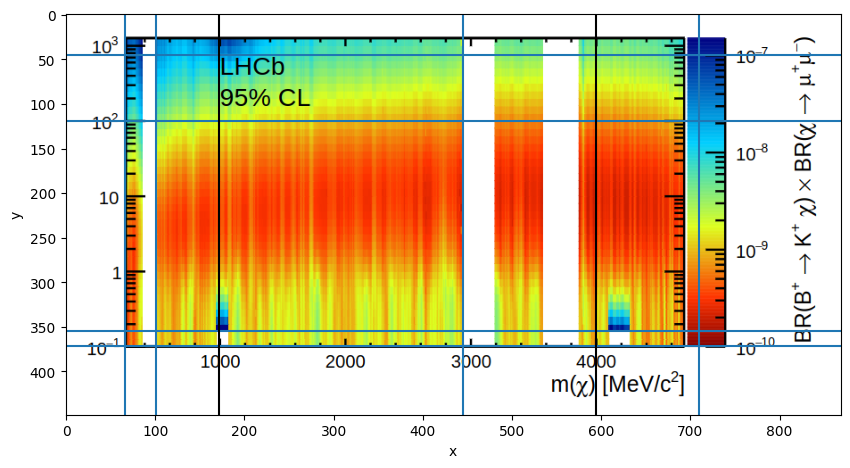

In [3]:
img = Image.open('LHCb.png')
imgH = img.convert('HSV')

plt.figure(figsize=(10,10))
plt.imshow(np.asarray(img))
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(710)
plt.axhline(372)
plt.axhline(45)
plt.axvline(101)
plt.axvline(445)

plt.axhline(119)
plt.axhline(355)

plt.axvline(172, c='k') # 1GeV
plt.axvline(594, c='k') # 4GeV

plt.axvline(66.5)

In [4]:
cbar = []
sbar = []
vbar = []
for y in range(45, 372):
    cbar.append(imgH.getpixel((710, y))[0])
    sbar.append(imgH.getpixel((710, y))[1])
    vbar.append(imgH.getpixel((710, y))[2])

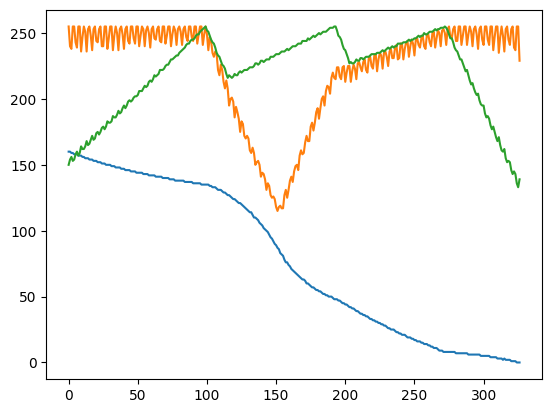

In [5]:
plt.plot(cbar)
plt.plot(sbar)
plt.plot(vbar)

In [6]:
cbar_dict = {cbar[i]: -7-3*i/len(cbar) for i in range(len(cbar))}

In [7]:
cbar_dict[140]

-7.660550458715596

In [8]:
lims = []
for x in range(101, 445):
    maxBR = -6
    for y in range(120, 350):
        pix = imgH.getpixel((x, y))[0]
        while not pix in cbar_dict.keys():
            pix -= 1
        BR = cbar_dict[pix]
        maxBR = min(maxBR, BR)
    lims.append(maxBR)

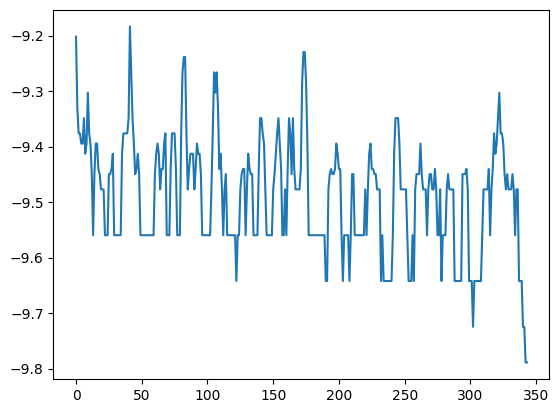

In [9]:
plt.plot(lims)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import particle.literals
import flavio
plt.rcParams['text.usetex'] = True
hbar = 6.582119569e-13 # GeV ps
me = particle.literals.e_minus.mass / 1000 # GeV
mmu = particle.literals.mu_minus.mass / 1000 # GeV
mtau = particle.literals.tau_minus.mass / 1000 # GeV
fa = 1000 # GeV

mB = particle.literals.B_plus.mass / 1000 # GeV
mK = particle.literals.K_plus.mass / 1000 # GeV
mpi = particle.literals.pi_plus.mass / 1000 # GeV
GammaB = particle.literals.B_plus.width / 1000 # GeV
GammaK = particle.literals.K_plus.width / 1000 # GeV
alpha_em = 1/137
sW = np.sqrt(0.2229)

mtop = particle.literals.t.mass / 1000
mcharm = particle.literals.c.mass / 1000
mup = particle.literals.u.mass / 1000
mW = particle.literals.W_minus.mass / 1000

In [11]:
def tau_alp(ma, cll):
    if ma > 2*mtau:
        ml = mtau
    elif ma > 2*mmu:
        ml = mmu
    else:
        ml = me
    return 8*np.pi*fa**2*hbar/(ma*ml**2*cll**2*np.sqrt(1-4*ml**2/ma**2))

In [12]:
def loop_function(x):
    return x*(1+x*(np.log(x) - 1))/(1-x)**2

In [13]:
xit = flavio.physics.ckm.xi('t', 'bs')(flavio.default_parameters.get_central_all())

/home/jorge/.local/lib/python3.12/site-packages/ckmutil/ckm.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  c12 = cos(t12)
/home/jorge/.local/lib/python3.12/site-packages/ckmutil/ckm.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  c23 = cos(t23)
/home/jorge/.local/lib/python3.12/site-packages/ckmutil/ckm.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  s12 = sin(t12)
/home/jorge/.local/lib/python3.12/site-packages/ckmutil/ckm.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
  s23 = sin(t23)


In [14]:
xic = flavio.physics.ckm.xi('c', 'bs')(flavio.default_parameters.get_central_all())

In [15]:
xiu = flavio.physics.ckm.xi('u', 'bs')(flavio.default_parameters.get_central_all())

In [16]:
def gbs(cll, nlep=1):
    return -3*nlep*(4*np.pi*alpha_em)**2/(16*64*np.pi**4*sW**4)*cll/fa*(xit * loop_function(mtop**2/mW**2) + xic * loop_function(mcharm**2/mW**2) + xiu * loop_function(mup**2/mW**2))

In [17]:
def BR_BKa(cll, ma, nlep=1):
    return mB**3*abs(gbs(cll, nlep))**2/(64*np.pi)*f0(ma)**2*(1-mK**2/mB**2)**2*np.sqrt((1-(ma+mK)**2/mB**2)*(1-(ma-mK)**2/mB**2))/GammaB

In [18]:
def ma_2_x(m):
    return (594-172)/3*m+172-(594-172)/3

In [19]:
def tau_2_y(tau):
    return (119-372)/(2+1)*np.log10(tau)+372+(119-372)/(2+1)

In [20]:
tau_2_y(10)

203.33333333333337

In [21]:
ma_2_x(0.25)

66.5

In [22]:
c_bound = []
for m in np.linspace(0.27, 2.92, 200):
    c_excluded = 0
    for c in [0.3*10**x for x in np.linspace(-1, 0, 100)]:
        tau = tau_alp(m, c)
        if tau < 1e-1 or tau > 1e3:
            continue
        br = BR_BKa(c, m, 3)
        if br < 1e-10 or br > 1e-7:
            continue
        x = ma_2_x(m)
        y = tau_2_y(tau)
        pix = imgH.getpixel((x, y))[0]
        if imgH.getpixel((x, y))[2] < 10:
            continue
        if imgH.getpixel((x, y))[1] < 10 and imgH.getpixel((x, y))[2] > 240:
            c_excluded = float('nan')
        while not pix in cbar_dict.keys():
            pix -= 1
        br_LHCb = 10**(cbar_dict[pix])
        if br < br_LHCb:
            c_excluded = c
    c_bound.append(c_excluded)

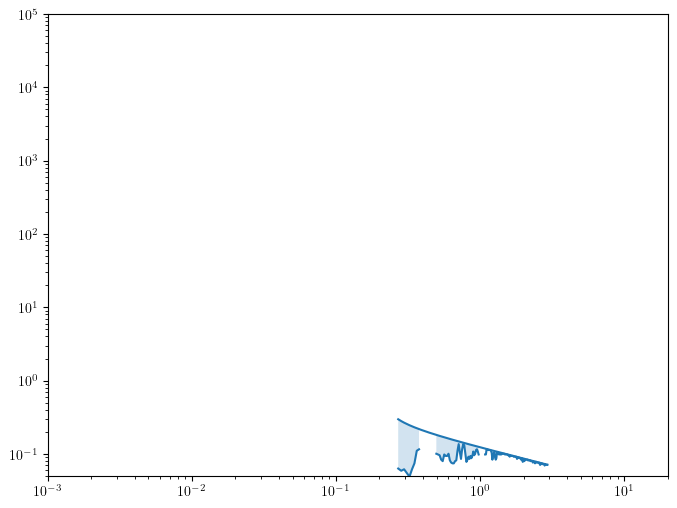

In [23]:
fig = plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0.27, 2.92, 200), c_bound)
plt.plot(np.linspace(0.27, 2.92, 200), [np.sqrt(tau_alp(m, 1)/0.1) for m in np.linspace(0.27, 2.92, 200)], c='tab:blue')
plt.fill_between(np.linspace(0.27, 2.92, 200), c_bound, [np.sqrt(tau_alp(m, 1)/0.1) for m in np.linspace(0.27, 2.92, 200)], alpha=0.2)
plt.ylim([5e-2, 1e5])
plt.xlim([1e-3, 20])
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

In [24]:
c_bound

[0.06314712433536063,
 0.058891219501208125,
 0.06169536925045954,
 0.05492214840886105,
 0.04889252503861933,
 0.06169536925045954,
 0.07431229067975134,
 0.11035139315485902,
 0.11560585781131588,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.10054807952816527,
 0.09823647488633187,
 0.0959780141339215,
 0.08347678206621373,
 0.0796826334884006,
 0.09823647488633187,
 0.09377147549064711,
 0.09377147549064711,
 0.10054807952816527,
 0.08155764728198821,
 0.07606093481910335,
 0.07431229067975134,
 0.07431229067975134,
 0.0796826334884006,
 0.08155764728198821,
 0.11035139315485902,
 0.13604635524385744,
 0.10533575202645394,
 0.08544107605307406,
 0.11560585781131588,
 0.13604635524385744,
 0.12986283843249177,
 0.10054807952816527,
 0.07785072634199207,
 0.08347678206621373,
 0.09161566526500246,
 0.08544107605307406,
 0.09377147549064711,
 0.08745159188475532,
 0.09377147549064711,
 0.10781440991413882,
 0.0959780141339215,
 0.10054807952816527,
 0.11294807420377403,
 0.115605

In [25]:
import pandas as pd

df = pd.DataFrame({'ma_GeV': np.linspace(0.27, 2.92, 200), 'lim_inf': c_bound, 'lim_sup': [np.sqrt(tau_alp(m, 1)/0.1) for m in np.linspace(0.27, 2.92, 200)]})

In [26]:
df.to_csv('../money_plot/displaced_BKmumu.csv', index=False)

# $B\to K^* a$

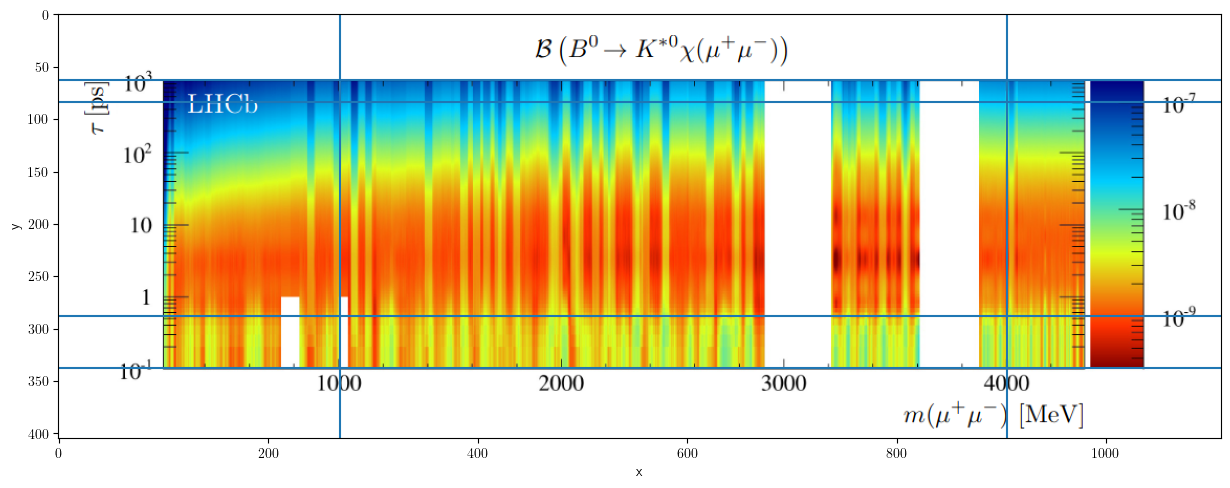

In [27]:
img = Image.open('LHCb_BKs.png')
imgH = img.convert('HSV')

plt.figure(figsize=(15,15))
plt.imshow(np.asarray(img))
plt.xlabel('x')
plt.ylabel('y')


plt.axhline(338) # Bottom plot/legend
plt.axhline(63) # Top plot/legend
plt.axhline(288) # Colorbar 1e-9
plt.axhline(84) # Colorbar 1e-7

plt.axvline(268) # ma=1GeV
plt.axvline(905) #ma=4GeV

In [28]:
cbar = []
sbar = []
vbar = []
for y in range(65, 338):
    cbar.append(imgH.getpixel((1000, y))[0])
    sbar.append(imgH.getpixel((1000, y))[1])
    vbar.append(imgH.getpixel((1000, y))[2])

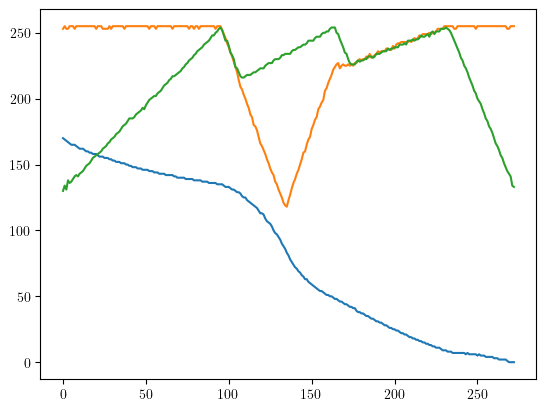

In [29]:
plt.plot(cbar)
plt.plot(sbar)
plt.plot(vbar)

In [30]:
cbar_dict = {cbar[i]: 2/(84-288)*(i+65)-9-288*2/(84-288) for i in range(len(cbar))}

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import particle.literals
import flavio
plt.rcParams['text.usetex'] = True
hbar = 6.582119569e-13 # GeV ps
mmu = particle.literals.mu_minus.mass / 1000 # GeV
mtau = particle.literals.tau_minus.mass / 1000 # GeV
fa = 1000 # GeV

mB = particle.literals.B_plus.mass / 1000 # GeV
mK = particle.literals.K_plus.mass / 1000 # GeV
mB0 = particle.literals.B_0.mass / 1000 # GeV
mKs = particle.literals.Kst_892_0.mass / 1000 #GeV
GammaB = particle.literals.B_plus.width / 1000 # GeV
GammaB0 = particle.literals.B_0.width / 1000 # GeV
alpha_em = 1/137
sW = np.sqrt(0.2229)

mtop = particle.literals.t.mass / 1000
mcharm = particle.literals.c.mass / 1000
mup = particle.literals.u.mass / 1000
mW = particle.literals.W_minus.mass / 1000

In [32]:
def tau_alp(ma, cll):
    if ma > 2*mtau:
        ml = mtau
    elif ma > 2*mmu:
        ml = mmu
    else:
        ml = me
    return 8*np.pi*fa**2*hbar/(ma*ml**2*cll**2*np.sqrt(1-4*ml**2/ma**2))

In [33]:
def loop_function(x):
    return x*(1+x*(np.log(x) - 1))/(1-x)**2

In [34]:
xit = flavio.physics.ckm.xi('t', 'bs')(flavio.default_parameters.get_central_all())
xic = flavio.physics.ckm.xi('c', 'bs')(flavio.default_parameters.get_central_all())
xiu = flavio.physics.ckm.xi('u', 'bs')(flavio.default_parameters.get_central_all())

In [35]:
def gbs(cll, nlep=1):
    return -3*nlep*(4*np.pi*alpha_em)**2/(16*64*np.pi**4*sW**4)*cll/fa*(xit * loop_function(mtop**2/mW**2) + xic * loop_function(mcharm**2/mW**2) + xiu * loop_function(mup**2/mW**2))

In [36]:
def BR_BKsa(cll, ma, nlep=1):
    return mB0**3*abs(gbs(cll, nlep))**2/(64*np.pi)*A0(ma)**2*np.sqrt((1-(ma+mKs)**2/mB0**2)*(1-(ma-mKs)**2/mB0**2))**3/GammaB0

In [37]:
def ma_2_x(m):
    return (905-268)/3*m+268-(905-268)/3

In [38]:
ma_2_x(2)

480.33333333333337

In [39]:
def tau_2_y(tau):
    return (63-338)/(3+1)*np.log10(tau)+338+(63-338)/(3+1)

In [40]:
tau_2_y(10)

200.5

In [41]:
c_bound_BKs = []
for m in np.linspace(0.27, 2.92, 200):
    c_excluded = 0
    for c in [0.3*10**x for x in np.linspace(-1, 0, 100)]:
        tau = tau_alp(m, c)
        if tau < 1e-1 or tau > 1e3:
            continue
        br = BR_BKsa(c, m, 3)
        if br < 1e-10 or br > 1e-7:
            continue
        x = ma_2_x(m)
        y = tau_2_y(tau)
        pix = imgH.getpixel((x, y))[0]
        if imgH.getpixel((x, y))[2] < 10:
            continue
        if imgH.getpixel((x, y))[1] < 10 and imgH.getpixel((x, y))[2] > 240:
            c_excluded = float('nan')
        while not pix in cbar_dict.keys():
            pix -= 1
        br_LHCb = 10**(cbar_dict[pix])
        if br < br_LHCb:
            c_excluded = c
    c_bound_BKs.append(c_excluded)

In [42]:
import pandas as pd

BaBar_10cm = pd.read_csv('BaBar_gamma_100mm.csv')

In [43]:
Lambda = 1000
a_em = 1/137

def Gamma_agammagamma(cll, mphi: float) -> list[float]:
    def f(x):
        if x >= 1:
            return np.arcsin(x**-0.5)
        else:
            return np.pi/2+0.5j*np.log((1+(1-x)**0.5)/(1-(1-x)**0.5))
    B1 = lambda x: 1-x*f(x)**2
    return cll**2*a_em**2*mphi**3/(Lambda**2*(4*np.pi)**3)*abs(B1(4*mtau**2/mphi**2))**2

def Gamma_agammagamma_lep(cll, mphi: float) -> list[float]:
    def f(x):
        if x >= 1:
            return np.arcsin(x**-0.5)
        else:
            return np.pi/2+0.5j*np.log((1+(1-x)**0.5)/(1-(1-x)**0.5))
    B1 = lambda x: 1-x*f(x)**2
    return cll**2*a_em**2*mphi**3/(Lambda**2*(4*np.pi)**3)*abs(B1(4*mtau**2/mphi**2)+B1(4*mmu**2/mphi**2)+B1(4*me**2/mphi**2))**2

def tau_alp_gamma(cll, m):
    return hbar/Gamma_agammagamma(cll, m)

In [44]:
bound_gamma = []
for (m, BR) in zip(BaBar_10cm['ma_GeV'], BaBar_10cm['BR_gammagamma']):
    if BR < BR_BKa((tau_alp_gamma(m, 1)/(10/0.03))**0.5, m):
        bound_gamma.append((tau_alp_gamma(m, 1)/(10/0.03))**0.5)
    else:
        bound_gamma.append((tau_alp_gamma(m, 1)/(1/0.03))**0.5)

/tmp/ipykernel_8317/3975953471.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  return 8*np.pi*fa**2*hbar/(ma*ml**2*cll**2*np.sqrt(1-4*ml**2/ma**2))


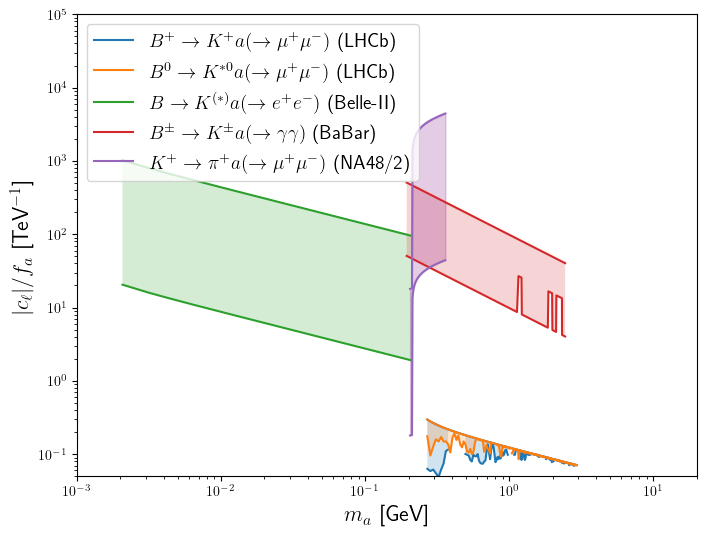

In [61]:
fig = plt.figure(figsize=(8, 6))

plt.plot(np.linspace(0.27, 2.92, 200), c_bound, label=r'$B^+\to K^+ a(\to \mu^+\mu^-)$ (LHCb)')
plt.plot(np.linspace(0.27, 2.92, 200), [np.sqrt(tau_alp(m, 1)/0.1) for m in np.linspace(0.27, 2.92, 200)], c='tab:blue')
plt.fill_between(np.linspace(0.27, 2.92, 200), c_bound, [np.sqrt(tau_alp(m, 1)/0.1) for m in np.linspace(0.27, 2.92, 200)], alpha=0.2)
plt.plot(np.linspace(0.27, 2.92, 200), c_bound_BKs, label=r'$B^0\to K^{*0} a(\to \mu^+ \mu^-)$ (LHCb)')
plt.plot(np.linspace(0.27, 2.92, 200), [np.sqrt(tau_alp(m, 1)/0.1) for m in np.linspace(0.27, 2.92, 200)], c='tab:orange')
plt.fill_between(np.linspace(0.27, 2.92, 200), c_bound_BKs, [np.sqrt(tau_alp(m, 1)/0.1) for m in np.linspace(0.27, 2.92, 200)], alpha=0.2)
plt.loglog(np.linspace(2*me, 1.99*mmu, 200), [(tau_alp(m, 1)/(2.5/0.03) )**0.5 for m in np.linspace(2*me, 1.99*mmu, 200)], label=r'$B\to K^{(*)}a(\to e^+ e^-)$ (Belle-II)')
plt.loglog(np.linspace(2*me, 1.99*mmu, 200), [(tau_alp(m, 1)/(0.001/0.03) )**0.5 for m in np.linspace(2*me, 1.99*mmu, 200)], c='tab:green')
plt.fill_between(np.linspace(2*me, 1.99*mmu, 200), [(tau_alp(m, 1)/(2.5/0.03) )**0.5 for m in np.linspace(2*me, 1.99*mmu, 200)], [(tau_alp(m, 1)/(0.001/0.03) )**0.5 for m in np.linspace(2*me, 1.99*mmu, 200)], alpha=0.2)
plt.loglog(BaBar_10cm['ma_GeV'], bound_gamma, label=r'$B^\pm\to K^\pm a(\to \gamma\gamma)$ (BaBar)')
plt.loglog(BaBar_10cm['ma_GeV'], [(tau_alp_gamma(m, 1)/(0.1/0.03))**0.5 for m in BaBar_10cm['ma_GeV']], c='tab:red')
plt.fill_between(BaBar_10cm['ma_GeV'], bound_gamma, [(tau_alp_gamma(m, 1)/(0.1/0.03))**0.5 for m in BaBar_10cm['ma_GeV']], alpha=0.2)
plt.plot(np.linspace(0.205, 0.36, 100), [np.sqrt(10/tau_alp(m, 1)) for m in np.linspace(0.205, 0.36, 100)], c='tab:purple', label=r'$K^+\to \pi^+a(\to \mu^+\mu^-)$ (NA48/2)')
plt.plot(np.linspace(0.205, 0.36, 100), [np.sqrt(1e5/tau_alp(m, 1)) for m in np.linspace(0.205, 0.36, 100)], c='tab:purple')
plt.fill_between(np.linspace(0.205, 0.36, 100), [np.sqrt(10/tau_alp(m, 1)) for m in np.linspace(0.205, 0.36, 100)], [np.sqrt(1e5/tau_alp(m, 1)) for m in np.linspace(0.205, 0.36, 100)], color='purple', alpha=0.2)
plt.ylim([5e-2, 1e5])
plt.xlim([1e-3, 20])
plt.legend(fontsize=14)
plt.xlabel(r'$m_a$ [GeV]', fontsize=16)
plt.ylabel(r'$|c_\ell|/f_a$ [TeV$^{-1}$]', fontsize=16)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

In [46]:
c_LHCb = []
for c1, c2 in zip(c_bound, c_bound_BKs):
    if np.isnan(c1):
        c_LHCb.append(c2)
    else:
        c_LHCb.append(min(c1, c2))

In [62]:
pd.DataFrame({'ma_GeV': np.linspace(0.27, 2.92, 200), 'cl_inf': c_bound, 'cl_sup': [np.sqrt(tau_alp(m, 1)/0.1) for m in np.linspace(0.27, 2.92, 200)]}).to_csv('../data/displacedv/LHCb_BKa.csv')
pd.DataFrame({'ma_GeV': np.linspace(0.27, 2.92, 200), 'cl_inf': c_bound_BKs, 'cl_sup': [np.sqrt(tau_alp(m, 1)/0.1) for m in np.linspace(0.27, 2.92, 200)]}).to_csv('../data/displacedv/LHCb_BKsa.csv')
pd.DataFrame({'ma_GeV': np.linspace(0.27, 2.92, 200), 'cl_inf': c_LHCb, 'cl_sup': [np.sqrt(tau_alp(m, 1)/0.1) for m in np.linspace(0.27, 2.92, 200)]}).to_csv('../data/displacedv/LHCb_combined.csv')
pd.DataFrame({'ma_GeV': np.linspace(2*me, 1.99*mmu, 200), 'cl_inf': [(tau_alp(m, 1)/(2.5/0.03) )**0.5 for m in np.linspace(2*me, 1.99*mmu, 200)], 'cl_sup': [(tau_alp(m, 1)/(0.001/0.03) )**0.5 for m in np.linspace(2*me, 1.99*mmu, 200)]}).to_csv('../data/displacedv/BelleII_BKa.csv')
pd.DataFrame({'ma_GeV': BaBar_10cm['ma_GeV'], 'cl_inf': bound_gamma, 'cl_sup': [(tau_alp_gamma(m, 1)/(0.1/0.03))**0.5 for m in BaBar_10cm['ma_GeV']]}).to_csv('../data/displacedv/BaBar_BKa.csv')
pd.DataFrame({'ma_GeV': np.linspace(0.205, 0.36, 100), 'cl_inf': [np.sqrt(10/tau_alp(m, 1)) for m in np.linspace(0.205, 0.36, 100)], 'cl_sup':[np.sqrt(1e5/tau_alp(m, 1)) for m in np.linspace(0.205, 0.36, 100)]}).to_csv('../data/displacedv/NA58_Kpia.csv')

/tmp/ipykernel_8317/3975953471.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  return 8*np.pi*fa**2*hbar/(ma*ml**2*cll**2*np.sqrt(1-4*ml**2/ma**2))


In [48]:
import pandas as pd

In [49]:
data_Kpimumu = pd.read_csv('Kpimumu.csv')

In [50]:
data_Kpimumu.head()

,x,y
0,211.456954,2.167095e-08
1,212.251656,7.682387e-09
2,211.854305,4.377452e-09
3,214.039735,5.501207e-09
4,214.437086,2.771712e-09


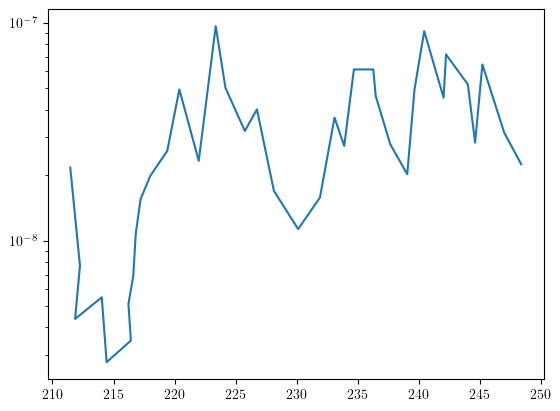

In [51]:
plt.semilogy(data_Kpimumu['x'], data_Kpimumu[' y'])

In [52]:
xit = flavio.physics.ckm.xi('t', 'sd')(flavio.default_parameters.get_central_all())
xic = flavio.physics.ckm.xi('c', 'sd')(flavio.default_parameters.get_central_all())
xiu = flavio.physics.ckm.xi('u', 'sd')(flavio.default_parameters.get_central_all())

In [53]:
def gsd(cll, nlep=1):
    return -3*nlep*(4*np.pi*alpha_em)**2/(16*64*np.pi**4*sW**4)*cll/fa*(xit * loop_function(mtop**2/mW**2) + xic * loop_function(mcharm**2/mW**2) + xiu * loop_function(mup**2/mW**2))

In [54]:
f0K = 0.97

In [55]:
def BR_Kpia(cll, ma, nlep=1):
    return mK**3*abs(gsd(cll, nlep))**2/(64*np.pi)*f0K**2*(1-mpi**2/mK**2)**2*np.sqrt((1-(ma+mpi)**2/mK**2)*(1-(ma-mK)**2/mK**2))/GammaK

(0.1, 100000.0)

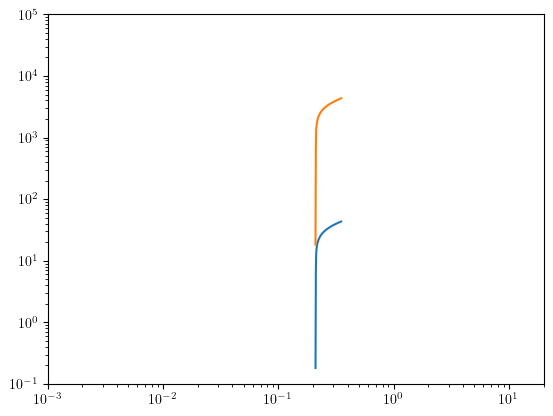

In [56]:
plt.loglog(np.linspace(0.21, 0.35, 100), [np.sqrt(10/tau_alp(m, 1)) for m in np.linspace(0.21, 0.35, 100)])
plt.loglog(np.linspace(0.21, 0.35, 100), [np.sqrt(1e5/tau_alp(m, 1)) for m in np.linspace(0.21, 0.35, 100)])
plt.xlim([1e-3, 20])
plt.ylim([1e-1, 1e5])

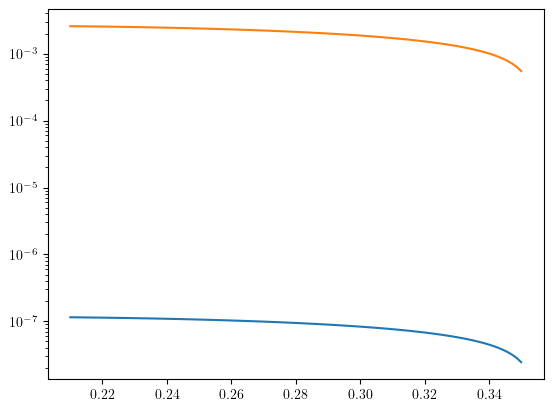

In [57]:
plt.semilogy(np.linspace(0.21, 0.35, 100), [BR_Kpia(20, m, 3) for m in np.linspace(0.21, 0.35, 100)])
plt.semilogy(np.linspace(0.21, 0.35, 100), [BR_Kpia(3e3, m, 3) for m in np.linspace(0.21, 0.35, 100)])

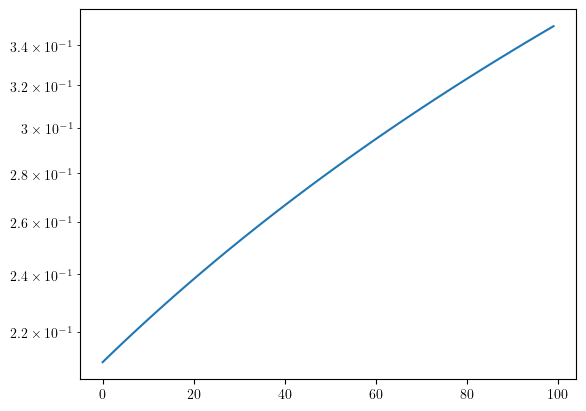

In [58]:
plt.semilogy(np.linspace(0.21, 0.35, 100), )